# CIFAR embedding through sklearn#

Simple program to check how the different algorithms available through sklearn do at classifing images of cats and dogs. As expected, the problem is not simple enough for this programs to work. To be able to distinguish between the two, a more complex routine will be needed.

In [10]:
import math
import os
from matplotlib import pyplot as plt
import numpy as np
from six.moves import cPickle 
import matplotlib.pyplot as plt
from sklearn import manifold
from tools import CifarLoader

# General parameters for classification
n_neighbors = 30
n_components = 2

A little function for plotting

In [2]:
def plotting(X, Y):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(X[:, 0],X[:, 1], c='b', label='Cats')
    ax1.scatter(Y[:, 0], Y[:, 1], c='r', label='Dogs')
    plt.legend(loc='upper left');
    
    return plt.show()

Let's use Patrick's program to load the CIFAR images. We load the images + reshape them as numpy arrays, needed for the following steps.

In [15]:
catsdogs = CifarLoader(path = 'data_batch_1')
cats_and_dogs = catsdogs.cats + catsdogs.dogs
n_cats, n_dogs = len(catsdogs.cats), len(catsdogs.dogs)
dims = cats_and_dogs[0].shape
cats_and_dogs = np.array(cats_and_dogs).reshape((n_cats+n_dogs, dims[0]*dims[1]*dims[1]))

Let's first try the  **Isomap embedding**

Computing Isomap embedding
Done.


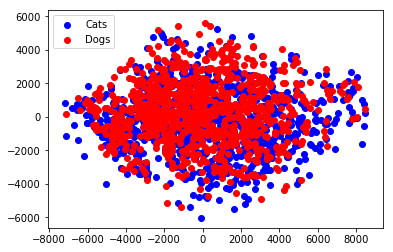

In [32]:
print("Computing Isomap embedding")
iso = manifold.Isomap(n_neighbors, n_components).fit_transform(cats_and_dogs)
print("Done.")
plotting(iso[:n_cats], iso[n_cats:])

Now let's do **Spectral embedding**. There are different method for this routine. However this 'standard' is the one giving less problems!

Computing Spectral embedding
Done.


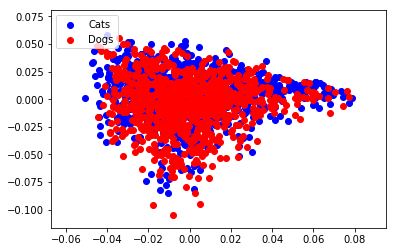

In [30]:
print("Computing Spectral embedding")
emb = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', 
                                        method = 'standard').fit_transform(cats_and_dogs)
print("Done.")
plotting(emb[:n_cats], emb[n_cats:])

Finally **t-SNE**

Computing t-SNE
Done.


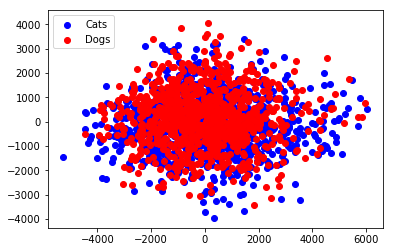

In [31]:
print("Computing t-SNE")
tSNE = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(cats_and_dogs)
print("Done.")
plotting(tSNE[:n_cats], tSNE[n_cats:])